1) Load dataset & quick overview

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_disease_uci.csv')

# Quick view
print("Shape:", df.shape)
display(df.head())        
print("\nInfo:")
print(df.info())
print("\nDescribe (numeric):")
print(df.describe())





Shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Describe (numeric):
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.0000

In [2]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


2) Exploratory Data Analysis (EDA) — Matplotlib / Seaborn visualisations

2.1 Detect target column & show distribution (Class Imbalance Check)

Target unique values and counts:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Proportions:
num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64


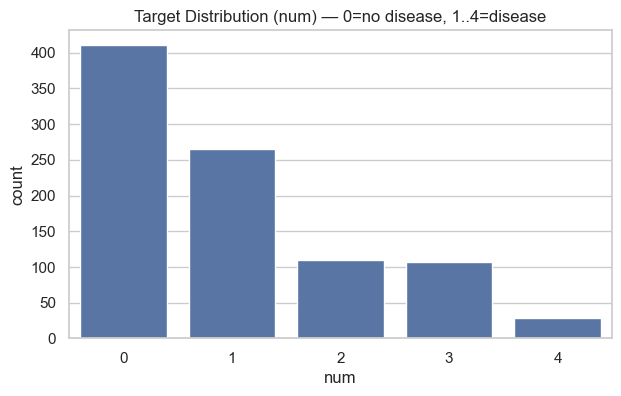

In [3]:
# target is 'num' in your data
target_col = 'num'
print("Target unique values and counts:")
print(df[target_col].value_counts())

# percentage
print("\nProportions:")
print(df[target_col].value_counts(normalize=True)) # normalize=True → instead of nymber give the  percentage ratio.

# # Plot distribution (requires matplotlib/seaborn)
# import matplotlib.pyplot as plt
# import seaborn as sns
sns.set(style='whitegrid')

plt.figure(figsize=(7,4))
sns.countplot(x=target_col, data=df)
plt.title('Target Distribution (num) — 0=no disease, 1..4=disease')
plt.show()


Therefore here class is imblanced so, will solve it in the feature engineering stage .

2.2 Missing values heatmap  => Quick visual of missing cells.

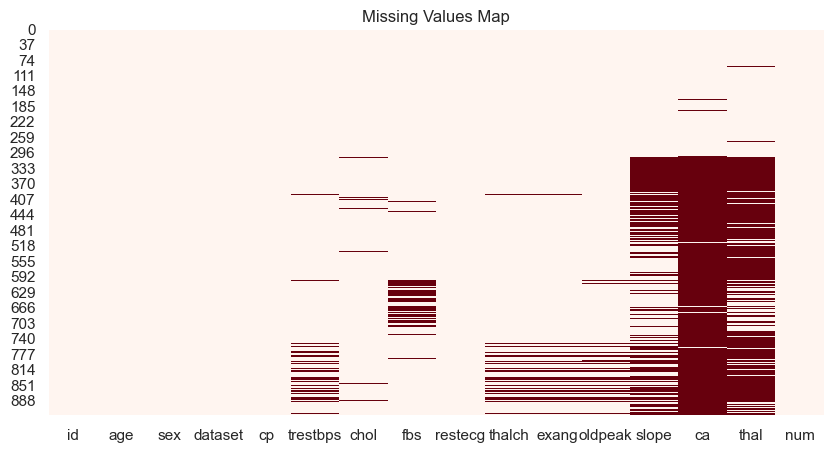

In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Map')
plt.show()


2.3 Numeric columns list

In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# remove id-like columns if present  
#id don't want to include id columns in numeric columns list
num_cols = [c for c in num_cols if c.lower() not in ['id','patientid','pid']]
print("Numeric columns:", num_cols)


Numeric columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


2.4 Histograms + KDE for numeric feature (Numeric features distribution)

“To visualize the distribution of the data to determine whether it is normal, skewed, or contains outliers.”

or

“Checking the data distribution to understand if it’s normal, skewed, or has any outliers.”

use also use 
Histogram for  (e.g., sns.histplot(data))

Boxplot for (outlier check)

Q-Q plot for  (normality check )

Decision Shortcut

| If you see…                       | It means…            | Use…                 |
| --------------------------------- | -------------------- | -------------------- |
| KDE line bell shape               | Normal               | Z-Score              |
| KDE long right tail               | Right skewed         | IQR or Log Transform |
| KDE long left tail                | Left skewed          | IQR                  |
| Too many far points (scatterplot) | Multivariate outlier | Isolation Forest     |
| Tiny dataset                      | Simple rules better  | IQR / Z-Score        |
| Big dataset (many features)       | High-dim outlier     | Isolation Forest     |
| Domain-specific weird values      | Logical error        | Rule-based filter    |


| Situation                            | Best Technique             |
| ------------------------------------ | -------------------------- |
| Data is **normally distributed**     | ✅ Z-Score                  |
| Data is **skewed / non-normal**      | ✅ IQR or Log Transform     |
| You want **automatic detection**     | ✅ Isolation Forest / LOF   |
| You don’t want to remove, only limit | ✅ Winsorization            |
| Dataset is **large & multi-feature** | ✅ Isolation Forest         |
| You know domain limits               | ✅ Domain rule-based filter |


| Goal                         | Technique                                            |
| ---------------------------- | ---------------------------------------------------- |
| Small dataset + few columns  | IQR or Z-Score                                       |
| Large dataset + many columns | Isolation Forest                                     |
| Skewed numeric               | Log Transform                                        |
| Categorical + numeric mix    | Use model robust to outliers (RandomForest, XGBoost) |
| Don’t want to lose data      | Winsorization (cap extremes)                         |


| Stage              | Method                 | When to Use                    |
| ------------------ | ---------------------- | ------------------------------ |
| **Detection**      | Boxplot, IQR, Z-Score  | To find which rows are extreme |
| **Removal**        | Drop rows              | When few outliers              |
| **Capping**        | Winsorization          | When many outliers             |
| **Transformation** | Log / Box-Cox          | When data skewed               |
| **Robust Model**   | RandomForest / XGBoost | When you can’t remove outliers |




## 🧩 **Part 1: Outlier Detection (চিহ্নিত করা)**

👉 মানে — “কোন ডাটা গুলো dataset এর অন্যগুলোর থেকে অনেক আলাদা বা দূরে আছে?”

### 🔹 1️⃣ Visual Detection

**(a)** Boxplot

```python
sns.boxplot(df['chol'])
plt.title('Cholesterol Outlier Check')
plt.show()
```

📊 বোঝা যাবে:

* Whisker (লাইন) এর বাইরে যে ডটগুলো আছে — সেগুলোই **outlier**।

**(b)** Histogram + KDE

```python
sns.histplot(df['age'], kde=True)
```

📊 বোঝা যাবে:

* যদি লাইনটি (KDE) একপাশে বেশি টানা থাকে → **Skewed data**
* Skewed মানে কিছু extreme value আছে → সম্ভাব্য outlier।

---

### 🔹 2️⃣ Statistical Detection

#### **(a) IQR (Interquartile Range) Method**

```python
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['chol'] < lower) | (df['chol'] > upper)]
print(outliers)
```

📖 ব্যাখ্যা:

* Q1 = 25% মানের নিচের ডাটা
* Q3 = 75% মানের নিচের ডাটা
* এর বাইরে থাকা মানগুলো খুব বড় বা ছোট — **outliers**।

#### **(b) Z-Score Method**

```python
from scipy import stats
z = np.abs(stats.zscore(df['chol']))
outliers = df[z > 3]
print(outliers)
```

📖 ব্যাখ্যা:

* Mean থেকে 3 standard deviation-এর বেশি দূরে থাকা মান → Outlier।

---

### 🔹 3️⃣ ML-Based Detection (Advanced)

#### **Isolation Forest**

```python
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso.fit_predict(df[['chol', 'age']])

df['outlier_flag'] = y_pred
outliers = df[df['outlier_flag'] == -1]
print(outliers)
```

📖 ব্যাখ্যা:

* যেগুলো “বাকিদের থেকে isolate” হয় দ্রুত — সেগুলো outlier।

---

## 🧩 **Part 2: Outlier Removal / Handling (সরানো বা ঠিক করা)**

👉 মানে — “Outlier ধরা পড়ার পর এখন কীভাবে সেটাকে ঠিক বা remove করা যায়।”

---

### 🔹 1️⃣ **Remove Outliers (Drop করা)**

যখন outlier কম (১–২%) — তখন সরিয়ে ফেলাই ভালো।

```python
df_clean = df[(df['chol'] >= lower) & (df['chol'] <= upper)]
```

📌 ভালো যদি ডাটাসেট বড় হয়।
📉 খারাপ যদি ডাটাসেট ছোট হয় (কারণ কিছু useful data হারাবে)।

---

### 🔹 2️⃣ **Capping / Winsorization (Replace করা)**

Extreme মানগুলো limit করে দেওয়া হয় — যেন খুব বেশি প্রভাব না ফেলে।

```python
df['chol'] = np.where(df['chol'] > upper, upper,
                      np.where(df['chol'] < lower, lower, df['chol']))
```

📖 এখানে বড় মানগুলা upper limit-এ কেটে দেওয়া হচ্ছে।

---

### 🔹 3️⃣ **Transformation (Data Smooth করা)**

যখন অনেক skewed outlier থাকে → transform করলে smooth হয়।

```python
df['chol'] = np.log1p(df['chol'])   # log transform
```

📌 Useful for right-skewed data (যেমন cholesterol, oldpeak ইত্যাদি)।

---

### 🔹 4️⃣ **Model-Robust Handling**

যদি তুমি outlier remove না করতে চাও,
তাহলে এমন model use করো যা outlier-এ কম sensitive 👇

| Model Type    | Why                          |
| ------------- | ---------------------------- |
| Random Forest | Tree splits handle outliers  |
| XGBoost       | Robust to extreme values     |
| Decision Tree | Non-linear + insensitive     |
| CatBoost      | Handles mixed data naturally |

---

## ✅ Summary Table

| Stage              | Method                 | When to Use                    |
| ------------------ | ---------------------- | ------------------------------ |
| **Detection**      | Boxplot, IQR, Z-Score  | To find which rows are extreme |
| **Removal**        | Drop rows              | When few outliers              |
| **Capping**        | Winsorization          | When many outliers             |
| **Transformation** | Log / Box-Cox          | When data skewed               |
| **Robust Model**   | RandomForest / XGBoost | When you can’t remove outliers |

---



📊 Visualize  →  Boxplot / Hist + KDE / Q-Q
       ↓
🔎 Detect → Z-Score (normal) / IQR (skewed)
       ↓
⚖️ Evaluate → কত outlier? (few/moderate/many)
       ↓
🧹 Handle →
     ├─ Drop (few)
     ├─ Cap (moderate)
     ├─ Transform (many/skew)
     └─ Robust Model (keep)
       ↓
✅ Re-check Visualization


2.4 Histograms + KDE for numeric feature (Numeric features distribution)

Numeric features distribution: =>

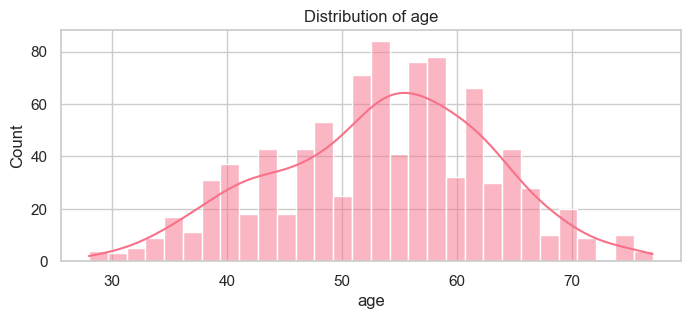

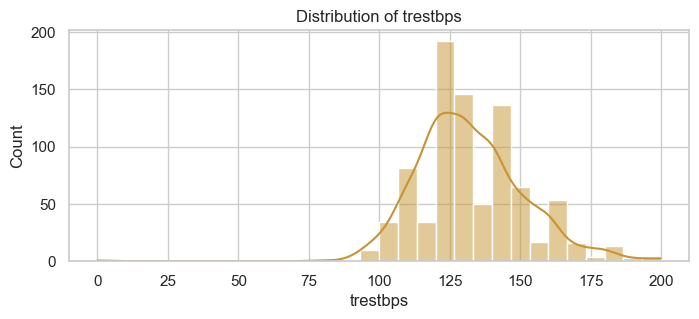

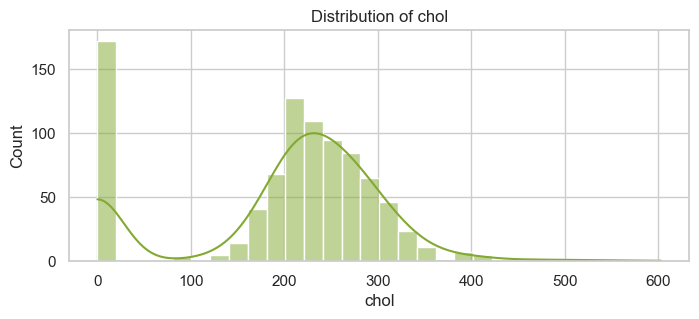

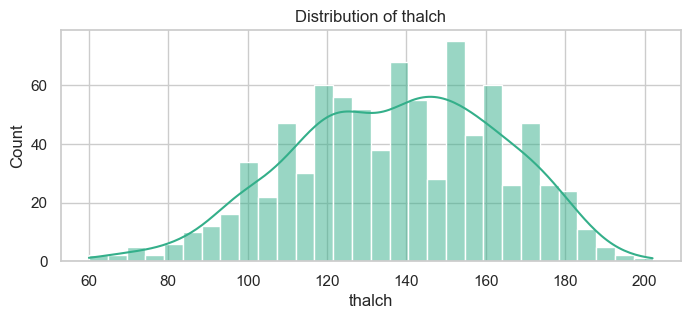

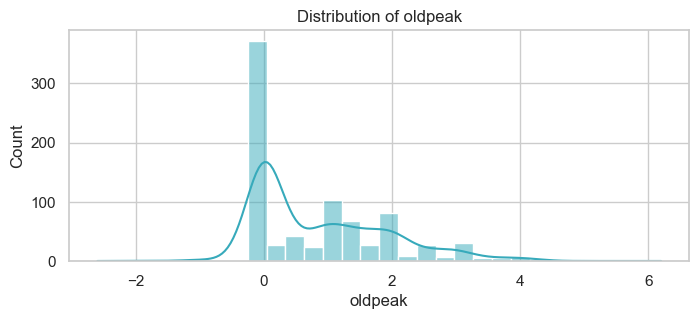

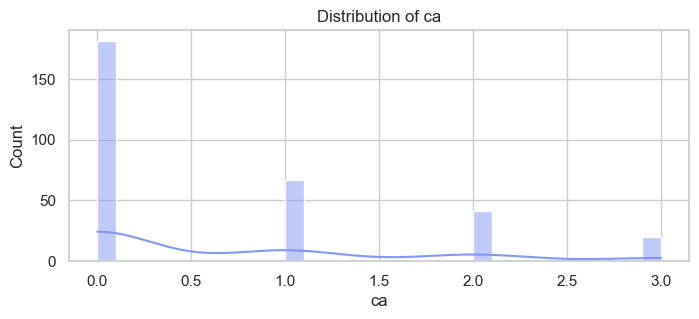

In [9]:
# for col in num_cols:
#     if col == target_col: 
#         continue
#     plt.figure(figsize=(8,3))
#     sns.histplot(df[col].dropna(), kde=True, bins=30)
#     plt.title(f'Distribution of {col}')
#     plt.show()

#for more colors
import seaborn as sns
import matplotlib.pyplot as plt
import random

colors = sns.color_palette("husl", len(num_cols))  # nice distinct colors

for i, col in enumerate(num_cols):
    if col == target_col:
        continue
    plt.figure(figsize=(8,3))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color=colors[i])
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



2.5 outlier detection

Boxplots for outlier detection

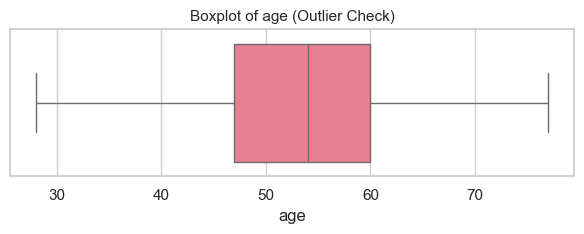

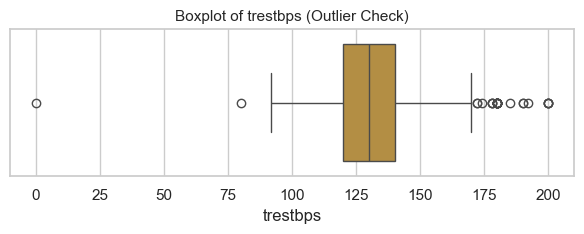

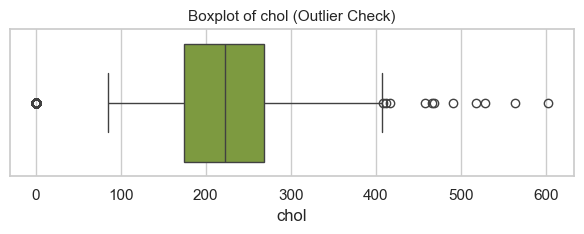

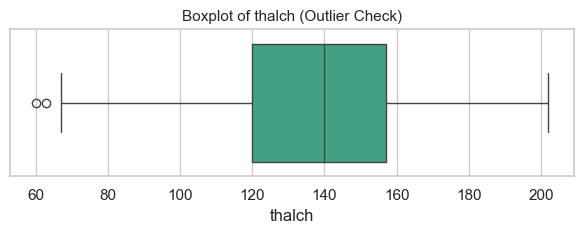

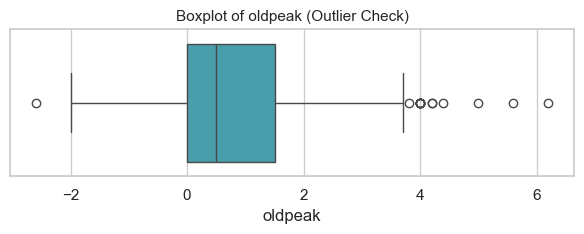

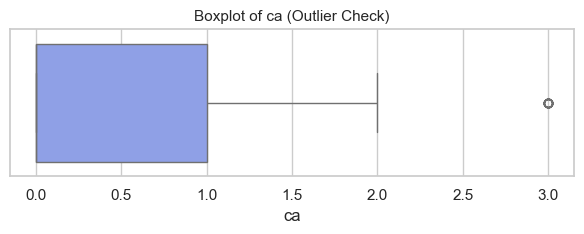

In [10]:
# for col in num_cols:
#     if col == target_col: 
#         continue
#     plt.figure(figsize=(6,2.5))
#     sns.boxplot(x=df[col])
#     plt.title(f'Boxplot of {col} (outlier check)')
#     plt.show()

#for more colors


# Generate distinct colors (one per numeric column)
colors = sns.color_palette("husl", len(num_cols))

for i, col in enumerate(num_cols):
    if col == target_col:
        continue
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=df[col], color=colors[i])   # assign a unique color
    plt.title(f'Boxplot of {col} (Outlier Check)', fontsize=11)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



2.6 Categorical columns & categorical vs target

🩺 Why this matters for you:

It helps you see relationships between categorical features and the target —
so you can decide:

which features are important (strongly influence target),

which are weak or irrelevant (almost same distribution for all num classes).

Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


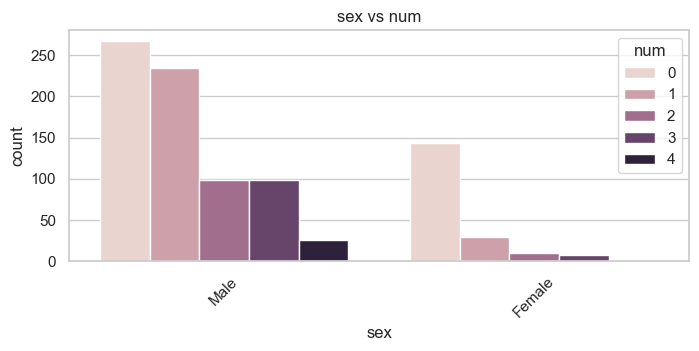

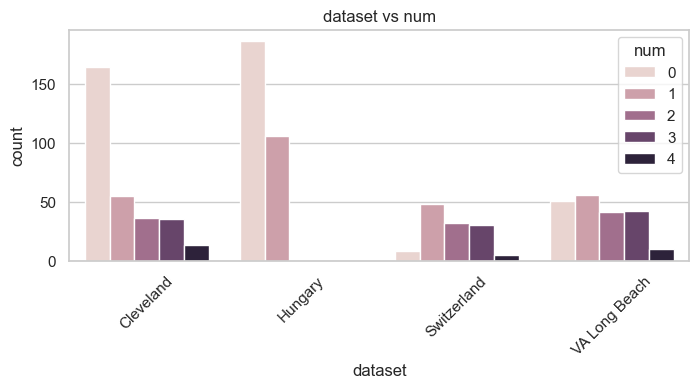

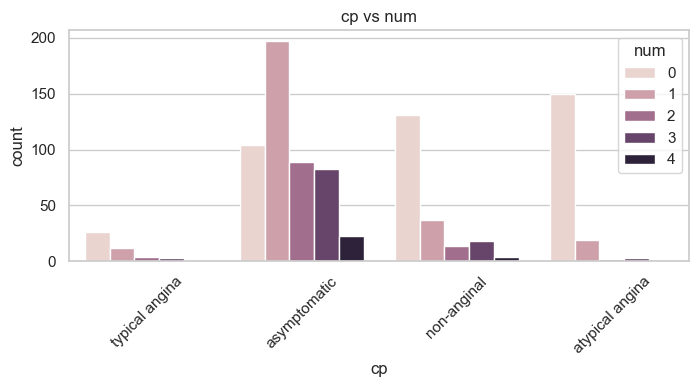

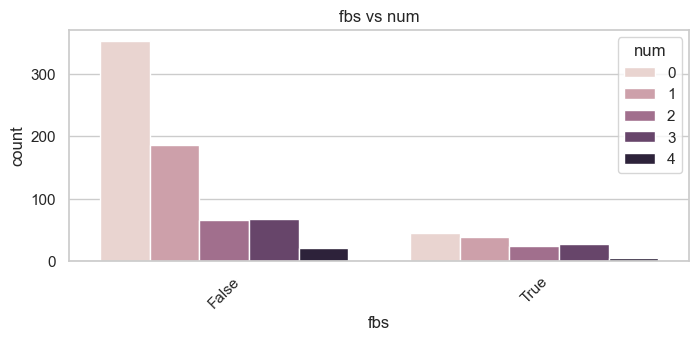

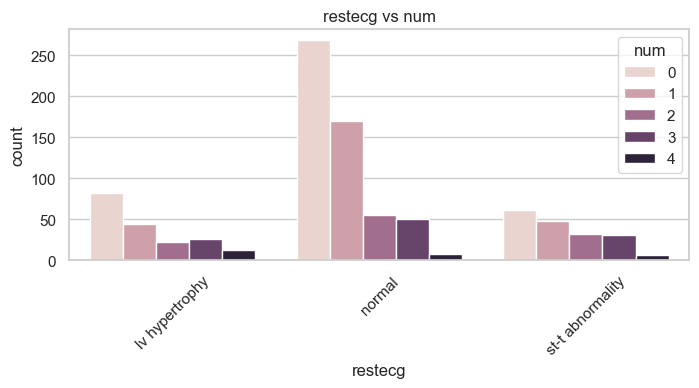

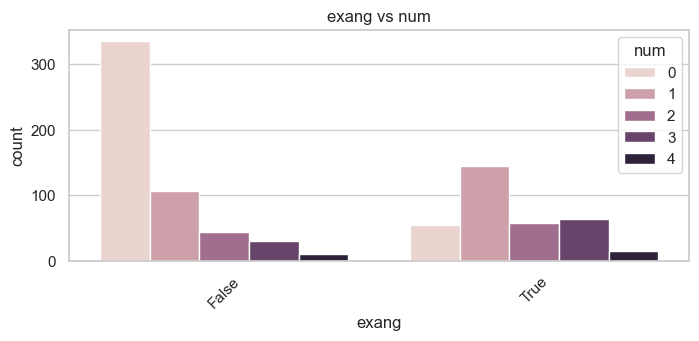

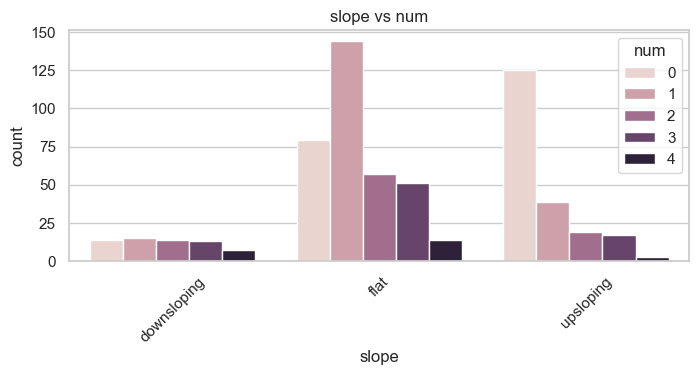

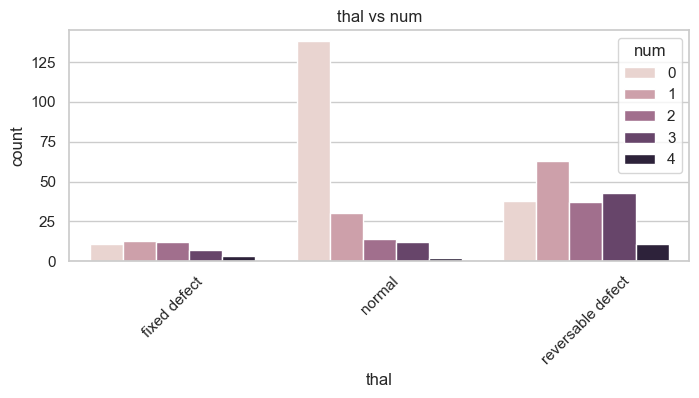

In [8]:
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print("Categorical columns:", cat_cols)

for col in cat_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f'{col} vs {target_col}')
    plt.xticks(rotation=45)
    plt.show()


2.7 Correlation Heatmap



### 🔹 **How Correlation Helps**

1️⃣ **Feature Selection** –
Helps identify which features are strongly related to the target → keep them for the model.
Weakly correlated ones (≈0) → can be dropped.

2️⃣ **Multicollinearity Check** –
If two features are highly correlated (|corr| > 0.8), they give duplicate info → drop one.

3️⃣ **Direction of Relationship** –
Positive corr → feature increases with target.
Negative corr → feature increases while target decreases.

4️⃣ **Data Understanding** –
Shows which variables truly impact the outcome; builds intuition about your dataset.

5️⃣ **Pre-Model Insight** –
A quick visual summary of useful vs redundant variables before training.

---

✅ **In short:**

> Correlation helps you find **important, redundant, and directional relationships** between features — making your model cleaner and smarter.


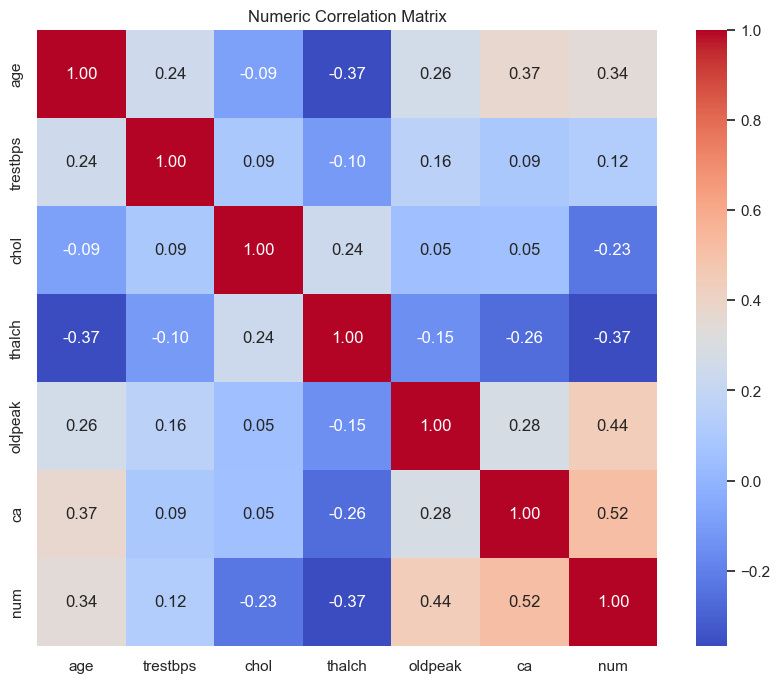

In [11]:
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric Correlation Matrix')
plt.show()


2.8 Outlier detection (IQR method)


Queston: but i have already check the outlier using by boxplot then why we use again Outlier detection (IQR method)??

Ans: Perfect 👏 — you’re absolutely right!
You already **used boxplots** to **visually detect outliers**,
so now your question is:

> “If I already found outliers using boxplots, do I still need the IQR detection code?”

Let’s make it super clear 👇

---

## 🔹 Step-by-Step Logic

### ✅ **1️⃣ Boxplot = Visual Detection**

* You already **saw** which columns have outliers.
* Boxplot shows **where** they are — visually (above or below whiskers).
* It’s **great for understanding pattern** (skewed, spread, etc.)

🧠 So after boxplot:

> You *know* which features have outliers — e.g. `chol`, `oldpeak`, `ca`.

---

### ✅ **2️⃣ IQR Code = Quantitative Detection**

* Boxplot only shows **that outliers exist**,
  but not **how many** or **how far** they are.
* The **IQR code** calculates:

  * exact `lower` & `upper` bounds
  * total outlier count per column
  * how wide the IQR is

👉 So it **confirms** and **quantifies** what the boxplot showed.

---

### ✅ **3️⃣ Capping = Treatment / Fix**

* Once you’re sure which columns have outliers
  → you use **capping code** (Code 1)
  → to safely limit those extreme values.

---

## ⚙️ **Best Professional Flow**

| Step | What you use       | Why                                   |
| ---- | ------------------ | ------------------------------------- |
| 1️⃣  | `sns.boxplot()`    | Visualize which columns have outliers |
| 2️⃣  | IQR reporting code | Quantify how severe they are          |
| 3️⃣  | IQR capping code   | Fix them (limit extreme values)       |

---

### 💡 In short:

> 🔹 You used **boxplot** to *see* outliers.
> 🔹 Use **IQR code** to *measure* them.
> 🔹 Use **capping code** to *handle* them.

---




💡 So my preference:

🔸 Visual (Boxplot / Histogram) → detect
🔸 IQR numeric report → confirm
🔸 IQR capping → clean

In [13]:
from scipy import stats

outlier_info = {}
for col in num_cols:
    if col == target_col: 
        continue
    s = df[col].dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outlier_count = s[(s < lower) | (s > upper)].shape[0]
    outlier_info[col] = {'Q1':Q1,'Q3':Q3,'IQR':IQR,'lower':lower,'upper':upper,'outliers':outlier_count}
print(pd.DataFrame(outlier_info).T[['IQR','lower','upper','outliers']])


            IQR   lower    upper  outliers
age       13.00  27.500   79.500       0.0
trestbps  20.00  90.000  170.000      28.0
chol      89.25  43.875  400.875     185.0
thalch    36.00  66.000  210.000       2.0
oldpeak    1.50  -2.250    3.750      16.0
ca         0.00   0.000    0.000     128.0


            IQR   lower    upper  outliers
age       13.00  27.500   79.500       0.0
trestbps  20.00  90.000  170.000      28.0
chol      89.25  43.875  400.875     185.0
thalch    36.00  66.000  210.000       2.0
oldpeak    1.50  -2.250    3.750      16.0
ca         0.00   0.000    0.000     128.0

========>


### 📊 **Outlier Detection Summary (IQR Method)**

| Column       | Meaning                                                                       | Example interpretation                                                                 |
| ------------ | ----------------------------------------------------------------------------- | -------------------------------------------------------------------------------------- |
| **IQR**      | Interquartile Range = Q3 − Q1 → measures the *spread* (range of middle 50%)   | For `chol`, IQR = 89.25 → middle 50% of cholesterol values are spread across 89 units. |
| **lower**    | Lower boundary for normal data = Q1 − 1.5 × IQR → below this = *low outlier*  | For `trestbps`, lower = 90 → any value below 90 is considered too low.                 |
| **upper**    | Upper boundary for normal data = Q3 + 1.5 × IQR → above this = *high outlier* | For `chol`, upper = 400.875 → any value above 400.9 is an outlier.                     |
| **outliers** | Number of rows (records) beyond these limits                                  | For `chol`, 185 outliers → 185 records have extremely high/low cholesterol values.     |

---

### 🧠 What You Can Learn

* **IQR (Interquartile Range):**

  * A *larger IQR* = more variability.
  * A *smaller IQR* = values are tightly packed.

* **Lower / Upper bounds:**

  * Define *normal range* for each numeric variable.
  * Anything beyond = potential *outlier*.

* **Outliers count:**

  * Helps decide whether to **cap**, **remove**, or **keep** them.

---

### 🔍 Example Reading from Your Output

| Variable                | Insight                                                                                                              |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------- |
| `trestbps`: 28 outliers | Blood pressure has 28 abnormal readings outside normal range (below 90 or above 170).                                |
| `chol`: 185 outliers    | Cholesterol has large variation — might need capping or normalization.                                               |
| `ca`: IQR = 0           | Means almost all values are same (low variation), but 128 extreme cases exist — data may be missing or inconsistent. |

---

✅ **In short:**

> IQR = spread of middle 50%
> lower & upper = normal limits
> outliers = count of abnormal points



After that we resolve or handle the outlier in feature englineering part...........--------->

🔹 Step 4 — Feature Engineering

4.1 Handle Missing Values

# Show missing again
print(df.isnull().sum())

# Numeric impute with median, categorical with mode
from sklearn.impute import SimpleImputer

num_cols_now = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_now = df.select_dtypes(include=['object','category','bool']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
df[num_cols_now] = num_imputer.fit_transform(df[num_cols_now])

cat_imputer = SimpleImputer(strategy='most_frequent')
for col in cat_cols_now:
    df[col] = cat_imputer.fit_transform(df[[col]])
    
print("After imputation, missing counts:\n", df.isnull().sum())



we can also use code for:

✅ Pros

Full imputation: handles both numeric and categorical features.

Automatically detects columns again (in case preprocessing changed them).

Uses median for numeric (robust) and mode for categorical (standard).

Prints missing values before and after → gives full control.




### 🔹 **Code Explanation**

```python
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])
```

---

### 🔍 **What it does**

👉 This code **fills (imputes) missing values (NaN)** in all **numeric columns (`num_cols`)**
by replacing them with the **median value** of that column.

---

### 💡 **Why “median”?**

* Median is **robust to outliers** (unlike mean).
* It gives a better “central” value for **skewed** or **non-normal** data.
* So your numeric columns won’t have NaNs — the model can train properly.

---

### 📊 **Where it applies in your dataset**

From your heart disease dataset (like **age, trestbps, chol, thalach, oldpeak, ca, num**):

* If any of these have **missing values**,
  → they will be replaced by the **median** of that feature.

For example:

| Column  | Before        | After Median Imputation |
| ------- | ------------- | ----------------------- |
| chol    | 250, NaN, 300 | 250, 240, 300           |
| oldpeak | 2.3, NaN, 1.4 | 2.3, 1.5, 1.4           |

---

### ⚠️ **If you don’t do this**

* Missing values (NaN) will break most ML models.
* They can also distort plots or correlation calculations.
* Median imputation keeps all rows usable — so **no data loss**.

---

✅ **In short:**

> You’re using median imputation to **safely handle missing numeric values**, especially in **columns like `chol`, `oldpeak`, or `ca`**, avoiding bias from outliers and preventing model errors.


In [12]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])


why: Median imputation outlier-resistant, so safest।

4.2 Outlier Treatment (IQR Capping)



You’ve written **two different (but similar)** methods for **handling outliers**, and both use the **IQR technique**, but their style and flexibility differ.
Let’s break this down clearly 👇

---

## 🧮 1️⃣ Your First Code:

```python
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
```

### ✅ Pros:

* Simple and direct.
* Works automatically for all numeric columns.

### ⚠️ Cons:

* Doesn’t let you **see which columns actually have outliers**.
* Applies capping to *every numeric column*, even those with **no outliers** — can cause **unnecessary distortion**.
* You lose visibility of how many outliers were present.

---

## 🧾 2️⃣ Improved Version (with `outlier_info` + `clip()`):

```python
cols_to_cap = [c for c,v in outlier_info.items() if v['outliers'] > 0]
for col in cols_to_cap:
    lower = outlier_info[col]['lower']
    upper = outlier_info[col]['upper']
    df[col] = df[col].clip(lower, upper)
```

### ✅ Pros:

* Much **cleaner and safer**.
* You **only cap** columns that actually *have outliers*.
* Uses `clip()` (cleaner and faster than `np.where()`).
* You can **control threshold** (e.g., cap only if outliers > 20 or > 5%).
* Easier to debug because you already have `outlier_info` printed.

### ⚠️ Cons:

* Needs `outlier_info` computed before (a small extra step).

---

## 🏆 **Best Option for Your Dataset (Heart Disease Data):**

👉 **Use the 2nd version (`clip()` with `outlier_info`)**

### Why:

* Your dataset (e.g., `chol`, `trestbps`, `oldpeak`) has **some** outliers but not all columns need correction.
* Using `clip()` keeps clean columns safe.
* You already have a nice `outlier_info` summary → so this integrates perfectly.

---

✅ **In summary:**

| Method                    | Use When                   | Recommended                     |
| ------------------------- | -------------------------- | ------------------------------- |
| `np.where()`              | Quick testing / small data | ⚠️ Not preferred for production |
| `clip()` + `outlier_info` | Controlled, clear, safe    | ✅ **Best for your case**        |

---


In [14]:
cols_to_cap = [c for c,v in outlier_info.items() if v['outliers'] > 0]
for col in cols_to_cap:
    lower = outlier_info[col]['lower']
    upper = outlier_info[col]['upper']
    df[col] = df[col].clip(lower, upper)


4.3 Feature encoding (categorical → numeric)

In [18]:
# ======================================
# 🔹 UNIVERSAL CATEGORICAL ENCODING CODE
# ======================================

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1️⃣ Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# 2️⃣ Convert boolean columns to integers (True/False → 1/0)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# 3️⃣ Encode categorical columns
le = LabelEncoder()

for col in cat_cols:
    unique = df[col].nunique()
    
    if unique == 2:
        # Binary categorical → Label Encode
        df[col] = le.fit_transform(df[col])
        
    elif unique > 2:
        # Multi-category → One-Hot Encode
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df.drop(columns=[col]), dummies], axis=1)

print("✅ All categorical columns encoded successfully!")
print(f"➡️ Final shape after encoding: {df.shape}")


✅ All categorical columns encoded successfully!
➡️ Final shape after encoding: (920, 23)


4.4 Feature scaling (for algorithms that need it)

Logistic, SVM, KNN need to scale. algorithm (SVM, Logistic) scaling-sensitive.


Tree-based models scale-insensitive। / Standardize features.
=>No, feature scaling is not necessary for tree-based models like decision trees and their ensembles (Random Forest, Gradient Boosting) because they are not sensitive to the scale of the features. These models make decisions based on a series of if-else rules, splitting on a single feature at a time, which is independent of the feature's scale.

In [19]:
from sklearn.preprocessing import StandardScaler

# ## Recompute numeric columns
# num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# num_cols = [c for c in num_cols if c.lower() not in ['id','patientid','pid'] and c != target_col]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


4.5 Feature Selection / Create targets (binary) and feature set


Let’s go step-by-step 👇

---

## 🧠 What is `SelectKBest`?

`SelectKBest` is a **feature selection** technique.
It helps you pick the *most relevant* features for your model, based on a statistical test (like `f_classif` for classification).

It does **not change data quality**, it just tries to remove “less useful” columns.

---

## ⚙️ Do you *need* `SelectKBest`?

👉 **Short answer:**
**No, it’s optional.**
Your model will still work **perfectly fine** without it.

But…

### ✅ Use it **if:**

* You have **a lot of features (say 30+ or 100+)**.
* You want to **reduce overfitting** or **speed up training**.
* You’re doing **exploratory modeling** and want to know *which features matter most*.

### ❌ You can skip it **if:**

* You only have a **small or moderate number of features (10–20)**.
* You’re using models like **tree-based methods** (RandomForest, XGBoost, LightGBM) —
  because these models *automatically handle* feature importance and redundancy.

---

## 💡 What happens if you **don’t use** it?

| Without `SelectKBest`                                                                       | With `SelectKBest`                                                |
| ------------------------------------------------------------------------------------------- | ----------------------------------------------------------------- |
| Model uses **all features** (some may be weak or redundant).                                | Model uses **top-k most relevant** features only.                 |
| Might slightly **increase training time** or **overfit** if data is small.                  | Can improve **speed** and sometimes **accuracy**.                 |
| Works fine, especially with **regularized** models (like LogisticRegression, RandomForest). | Helpful when doing **statistical analysis** or **linear models**. |

---

### 🧩 Best Practice

If your dataset is small and manageable (like Heart Disease dataset — ~13–15 features),
you can **skip `SelectKBest`** safely.

But if you’re experimenting or optimizing performance, use it once — it’s easy and gives good insights.

---

✅ **Recommendation for you:**
Since you’re working on the heart disease dataset (around 13 columns),
👉 You **don’t need** `SelectKBest`.
Your model will work just fine without it.

---


from sklearn.feature_selection import SelectKBest, f_classif

# 1️⃣ Convert target to binary (0 = no disease, 1 = any disease)
target_col = 'num'
df['target'] = df[target_col].apply(lambda x: 0 if x == 0 else 1)

# 2️⃣ Define X (features) and y (target)
X = df.drop(columns=[target_col, 'target'], errors='ignore')
y = df['target']

print("✅ Data split done.")
print("➡️ X shape:", X.shape)
print("➡️ Target distribution:\n", y.value_counts(normalize=True))

# 3️⃣ Feature Selection using ANOVA F-test
skb = SelectKBest(score_func=f_classif, k=10)
skb.fit(X, y)

# 4️⃣ Get top 10 selected columns
selected_cols = X.columns[skb.get_support()]
print("\n🏆 Selected Top Features (k=10):")
print(list(selected_cols))


from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop(columns=['num'])
y = df['num'].apply(lambda x: 0 if x == 0 else 1)  # binary target

skb = SelectKBest(score_func=f_classif, k=10)
skb.fit(X, y)
selected_cols = X.columns[skb.get_support()]
print("Selected Features:", list(selected_cols))


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop(columns=['num'])
y = df['num'].apply(lambda x: 0 if x == 0 else 1)  # binary target

skb = SelectKBest(score_func=f_classif, k=10)
skb.fit(X, y)
selected_cols = X.columns[skb.get_support()]
print("Selected Features:", list(selected_cols))

Selected Features: ['dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']


d:\anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


i am use this code :

from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier

# SelectKBest
k = min(12, X.shape[1])
skb = SelectKBest(score_func=f_classif, k=k)
skb.fit(X.fillna(0), y)
cols_skb = X.columns[skb.get_support()].tolist()
print("SelectKBest:", cols_skb)

# RFE with RandomForest
rf_for_rfe = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf_for_rfe, n_features_to_select=k)
rfe.fit(X.fillna(0), y)
cols_rfe = X.columns[rfe.support_].tolist()
print("RFE:", cols_rfe)

# Intersection
selected = list(set(cols_skb).intersection(set(cols_rfe)))
if len(selected) == 0:
    selected = cols_skb
print("Final selected features:", selected)




for:



## 🧠 What this code does (in simple English)

This code **selects the best features** (columns) from your dataset `X` that are most useful to predict your target `y`, using **two methods** —
`SelectKBest` and `RFE`.

Then it **compares both** and keeps the features that both methods agree on (the intersection).

---

## 🔍 Step-by-step Explanation

### 🥇 Step 1 — `SelectKBest`

```python
skb = SelectKBest(score_func=f_classif, k=k)
skb.fit(X.fillna(0), y)
cols_skb = X.columns[skb.get_support()].tolist()
```

➡️ This selects the **top k best features** based on the **ANOVA F-test** (`f_classif`) — a statistical test that measures how much each feature affects the target.

💡 *Think of this as a mathematical filter that ranks columns by importance.*

---

### 🥈 Step 2 — `RFE` (Recursive Feature Elimination)

```python
rf_for_rfe = RandomForestClassifier(...)
rfe = RFE(rf_for_rfe, n_features_to_select=k)
rfe.fit(X.fillna(0), y)
cols_rfe = X.columns[rfe.support_].tolist()
```

➡️ This uses a **machine learning model (RandomForest)** to rank feature importance and **eliminate the weakest ones** step by step until only the top `k` remain.

💡 *Think of this as an intelligent “feature pruning” process based on model performance.*

---

### 🧩 Step 3 — Combine Both Results

```python
selected = list(set(cols_skb).intersection(set(cols_rfe)))
if len(selected) == 0:
    selected = cols_skb
```

➡️ Takes only the **common features** chosen by both methods.
If none match, it falls back to the SelectKBest ones.

💡 *So you only keep features that are “statistically strong” and “model-important”.*

---

## ✅ Result

```python
print("Final selected features:", selected)
```

Shows the **final best features** that you should use for model training.

---

## ⚙️ Why this is done

This combo is used for **robust feature selection** —
it balances **statistics (SelectKBest)** and **machine learning intuition (RFE)**.

✅ **Advantages**

* Reduces overfitting
* Speeds up training
* Focuses model on truly useful features
* Works great when you have **many columns**

❌ **Can skip if:**

* Your dataset has **<15 columns** (like Heart Disease dataset) — then it’s optional
* You’re using **tree-based models** (like RandomForest, XGBoost) — they already handle importance internally

---

💬 **In short:**
This code is doing a *double-check* feature selection — both statistical and model-based — to find the most important features.
It’s not mandatory, but it’s a *professional best practice* for cleaner, more accurate models when you have many features.

---



🔹 Step 5 — Model Building with Model Evaluation

5.1 Split Data / Train-test split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_cols], y, test_size=0.2, stratify=y, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (736, 10) Test shape: (184, 10)


5.2 Baseline model — Logistic Regression + Model Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Reconstruct a correct binary target in case 'num' was accidentally scaled.
# If 'num' was scaled with the StandardScaler stored in `scaler` and `num_cols`
# contains 'num', reverse that scaling first; otherwise use df['num'] directly.
if 'num' in num_cols and 'scaler' in globals():
	try:
		idx = num_cols.index('num')
		# inverse scale: original = scaled * scale + mean
		original_num = df['num'] * scaler.scale_[idx] + scaler.mean_[idx]
	except Exception:
		original_num = df['num']
else:
	original_num = df['num']

# Round to nearest integer then binarize (0 -> 0, anything else -> 1)
orig_int = original_num.round().astype(int)
y_correct = orig_int.apply(lambda x: 0 if x == 0 else 1).astype(int)

# Prepare feature matrix using previously selected columns
X_selected = X[selected_cols] if 'selected_cols' in globals() else X

# Re-split the data so y matches X_selected

if len(y_correct.unique()) < 2:
	raise ValueError("Reconstructed target contains only one class. Check the original 'num' values in df.")
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_correct, test_size=0.2, stratify=y_correct, random_state=42)

# 1️⃣ Model initialize
lr = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)

# Check class distribution before training
print("y_train class distribution:\n", y_train.value_counts())

# 2️⃣ Train
lr.fit(X_train, y_train)

# 3️⃣ Predict
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

# 4️⃣ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



y_train class distribution:
 num
1    407
0    329
Name: count, dtype: int64
Accuracy: 0.7880434782608695
Precision: 0.8315789473684211
Recall: 0.7745098039215687
F1 Score: 0.8020304568527918
ROC AUC: 0.8769129603060737
Confusion Matrix:
 [[66 16]
 [23 79]]


5.3 Stronger models — RandomForest & XGBoost

In [28]:
%pip install xgboost

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# RandomForest
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("RF ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("RF F1:", f1_score(y_test, y_pred_rf))

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:,1]

print("XGB ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print("XGB F1:", f1_score(y_test, y_pred_xgb))


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 7.8 MB/s eta 0:00:10
   - -------------------------------------- 2.4/72.0 MB 9.3 MB/s eta 0:00:08
   -- ------------------------------------- 5.2/72.0 MB 10.7 MB/s eta 0:00:07
   ---- ----------------------------------- 7.9/72.0 MB 11.0 MB/s eta 0:00:06
   ----- ---------------------------------- 10.0/72.0 MB 11.1 MB/s eta 0:00:06
   ------ --------------------------------- 12.6/72.0 MB 11.0 MB/s eta 0:00:06
   -------- ------------------------------- 15.7/72.0 MB 11.7 MB/s eta 0:00:05
   ---------- ----------------------------- 18.9/72.0 MB 12.2 MB/s eta 0:00:05
   ------------ --------------------------- 22.3/72.0 MB 12.4 MB/s eta 0:00:04
   -------------- ------------------------- 26.5/72.0 MB 13.2 MB/s eta 0:00:04
   ---------------- ----------------------- 29.6/72.0 MB 13.3 MB/s eta 0:00:04
   ------------------ --------------------- 32.8/72.0 MB 13.4 MB/s 

d:\anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:52:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


6. Cross Validation

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X[selected_cols], y, cv=skf, scoring='roc_auc')
print("Mean ROC-AUC:", cv_scores.mean())



d:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "d:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "d:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ~~~~~~~~~~~~~~~~~~~~^
        estimator, *args, response_method=response_method, **kwargs
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "d:\anaconda\Lib\site-packages\sklearn\utils\_response.py", line 21

Mean ROC-AUC: nan


d:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "d:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "d:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ~~~~~~~~~~~~~~~~~~~~^
        estimator, *args, response_method=response_method, **kwargs
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "d:\anaconda\Lib\site-packages\sklearn\utils\_response.py", line 21

7. Hyperparameter tuning (RandomizedSearchCV example for RandomForest)

In [31]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 5, 7, 10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

rsearch = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=20, cv=skf, scoring='roc_auc', n_jobs=-1, random_state=42)
rsearch.fit(X_train, y_train)
print("Best params:", rsearch.best_params_)
best_rf = rsearch.best_estimator_

# Evaluate tuned model
y_prob_best = best_rf.predict_proba(X_test)[:,1]
print("Tuned RF ROC-AUC:", roc_auc_score(y_test, y_prob_best))


Best params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7}
Tuned RF ROC-AUC: 0.8869560019129602


8. Ensemble (Voting) example

In [32]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('lr', lr), ('rf', best_rf), ('xgb', xgb_clf)], voting='soft')
voting.fit(X_train, y_train)
y_prob_v = voting.predict_proba(X_test)[:,1]
print("Voting ROC-AUC:", roc_auc_score(y_test, y_prob_v))


Voting ROC-AUC: 0.8753586800573888


d:\anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [02:01:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


9. Final metrics & confusion matrix + ROC plot

Final Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77        82
           1       0.79      0.91      0.85       102

    accuracy                           0.82       184
   macro avg       0.83      0.80      0.81       184
weighted avg       0.82      0.82      0.81       184



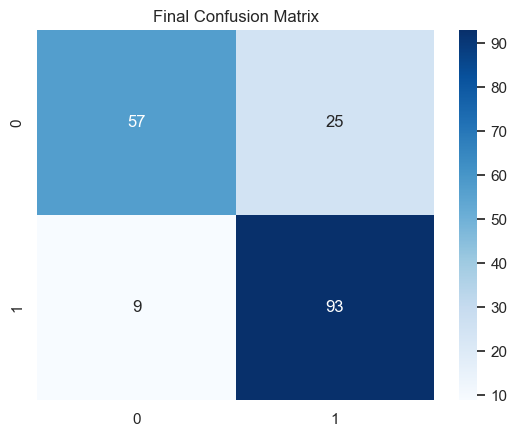

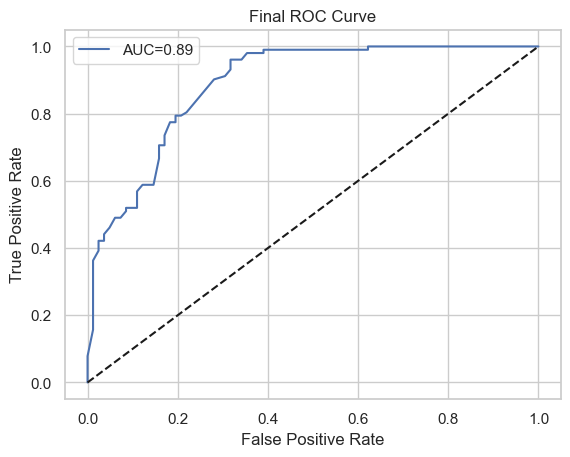

In [33]:
from sklearn.metrics import classification_report, roc_curve, auc

# choose final model (example: best_rf)
final_model = best_rf
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:,1]

print("Final Classification Report:\n", classification_report(y_test, y_pred_final))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
plt.title('Final Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob_final)
plt.plot(fpr, tpr, label=f'AUC={auc(fpr,tpr):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('Final ROC Curve')
plt.legend(); plt.show()


10. Save Final Model

here i take best/ final model as RandomForest

In [34]:
import joblib
joblib.dump(final_model, 'heart_best_model.pkl')
print("Saved model to heart_best_model.pkl")


Saved model to heart_best_model.pkl
